In [ ]:
from autogluon.multimodal import MultiModalPredictor
import os
import time

from autogluon.core.utils.loaders import load_zip
zip_file = "https://automl-mm-bench.s3.amazonaws.com/object_detection_dataset/tiny_motorbike_coco.zip"
download_dir = "./tiny_motorbike_coco"

#load_zip.unzip(zip_file, unzip_dir=download_dir)
data_dir = os.path.join(download_dir, "tiny_motorbike")
train_path = os.path.join(data_dir, "Annotations", "trainval_cocoformat.json")
test_path = os.path.join(data_dir, "Annotations", "test_cocoformat.json")
presets = "medium_quality"
# Init predictor
import uuid

model_path = f"./tmp/{uuid.uuid4().hex}-quick_start_tutorial_temp_save"

predictor = MultiModalPredictor(
    problem_type="object_detection",
    sample_data_path=train_path,
    presets=presets,
    path=model_path,
)
start = time.time()
predictor.fit(train_path)  # Fit
train_end = time.time()

In [ ]:
predictor.evaluate(test_path)
eval_end = time.time()

In [3]:
# Load and reset num_gpus
new_predictor = MultiModalPredictor.load(model_path)
new_predictor.set_num_gpus(1)

Load pretrained checkpoint: e:\code\python\dental\tmp\87165e884fe1494eb0779af2de05026c-quick_start_tutorial_temp_save\model.ckpt


In [ ]:
# Evaluate new predictor
new_predictor.evaluate(test_path)

In [ ]:
pred = predictor.predict(test_path)
print(pred)

image     ./tiny_motorbike_coco\tiny_motorbike\Annotatio...
bboxes    [{'class': 'motorbike', 'class_id': 7, 'bbox':...
Name: 30, dtype: object


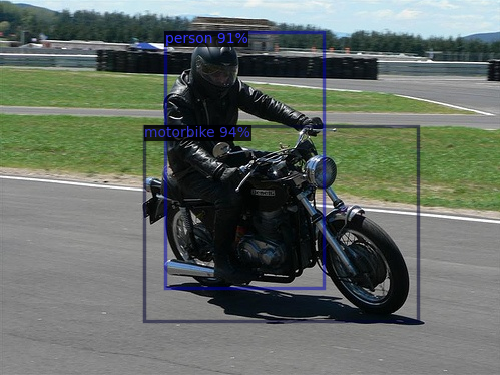

In [5]:
from autogluon.multimodal.utils import ObjectDetectionVisualizer

conf_threshold = 0.4  # Specify a confidence threshold to filter out unwanted boxes
image_result = pred.iloc[30]
print(image_result)
img_path = image_result.image  # Select an image to visualize

visualizer = ObjectDetectionVisualizer(img_path)  # Initialize the Visualizer
out = visualizer.draw_instance_predictions(image_result, conf_threshold=conf_threshold)  # Draw detections
visualized = out.get_image()  # Get the visualized image

from PIL import Image
from IPython.display import display
img = Image.fromarray(visualized, 'RGB')
display(img)

In [7]:
image_result

image     ./tiny_motorbike_coco\tiny_motorbike\Annotatio...
bboxes    [{'class': 'motorbike', 'class_id': 7, 'bbox':...
Name: 30, dtype: object